## Feature Engineering and Modelling
In this notebook, I will conduct feature engineering to select the best features from the dataset to be used to predict the student's performance. From the selected features, I will train machine learning models to be used to predict the students' performance.

In [2]:
# import necessary libraries and modules
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile as SP

In [26]:
# Read the dataset from the file into a pd dataframe
sys.path.append('../')
results = pd.read_csv('../data/student_prediction.csv')
results.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [235]:
#get a preview of the properties of the features
results.describe().T.style.background_gradient(cmap = "Accent")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


As seen during the EDA process, all columns are categorical and there are no missing values in the dataset

### Feature Selection
<p>Feature selection allows one to select only the properties of the dataset that are necessary to predict the target variable. In this project, I am going to use <b>Mutual Information</b> to select the features for use. Mutual Information measures the <b>Entropy drops</b> under the condition of the target value. The Mutual Information (MI) can be described using th following equation: </p>
<p><code>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;MI(feature;target) = Entropy(feature) - Entropy(feature|target)</code><br></p>
<p>The MI score falls in the range 0 to infinity. The higher the value, the closer the connection between the feature and the target variable. Higher connection means the feature should be included in the training dataset.</p>
<p>Scikit-Learn provides functions to calculate MI scores for features. It also provides feature selection function that selects the top n features and top n percentile features after calculating their MI scores. So I will not have to calculate the MI scores for each feature manually and select the needed features but I will use the selectors to select top n% features that are needed.</p>



In [4]:
# separate the features from the target variable
X = results.drop(['GRADE', 'STUDENTID'], axis=1) #features of interes
y = results['GRADE']

<li>First, I separated the features in the dataset from the target variable. In this project, the target variable is the GRADE column. The other columns except STUDENTID and COURSE ID are my features that will be used to predict the target.</li>

In [5]:
# using the train test split function from sklearn to split the dataset into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=23, 
                                   test_size=0.1, 
                                   shuffle=True)

In [238]:
#check if dataset is split properly
print(f'Shape of train set: {0}', X_train.shape)
print(f'Shape of test set: {0}', X_test.shape)

Shape of train set: 0 (130, 31)
Shape of test set: 0 (15, 31)


<li>The dataset was split into train and test properly. 116 rows will be used to train the model and the remaining 29 rows will be used to test our model performance</li>

<ul>
    <li>I will select 4 sets of features:</li>
        <ol>
            <li>Trainset using all features in the train dataset</li>
            <li>Trainset using only top 50% features selected </li>
            <li>Trainset using only top 75% features selected </li>
            <li>Trainset using top 80% features selected</li>
        </ol>
    <li>I will then select the set with less features and acccuracy as close to the training set when all features are selected</li>
</ul>

##### Train a model using all features

##### 1. Logistic Regression Model

In [262]:
# instantiate the model
logreg =  LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=7600) 

#fit the model
logreg.fit(X_train,y_train) 

#predict
y_pred=logreg.predict(X_test) 
y_pred



array([0, 3, 7, 5, 2, 1, 2, 5, 0, 0, 7, 2, 4, 1, 2], dtype=int64)

In [241]:
# Evaluate the model performance using the confusion matrix
print("logistic Regressor Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("logistic Regressor Precision:",metrics.precision_score(y_test, y_pred, average='micro')) 
print("logistic Regressor  Recall:",metrics.recall_score(y_test, y_pred,average='micro'))

logistic Regressor Accuracy: 0.2
logistic Regressor Precision: 0.2
logistic Regressor  Recall: 0.2


##### 2. Decision Tree Classifier

In [242]:
from sklearn.tree import DecisionTreeClassifier as DTC
model_1 = DTC().fit(X_train,y_train)
score_1 = model_1.score(X_test,y_test)
print('Accuracy of the Decision Tree Classifier: ', score_1)

Accuracy of the Decision Tree Classifier:  0.4


##### 3. K-Nearest Neighbour Classifier

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy of KNN classifier: ", clf_knn.score(X_test,y_test) )

Acurracy of KNN classifier:  0.26666666666666666


##### 4. Random Forest Classifier

In [264]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Random Forest Classifier Accurracy: ", clf_rf.score(X_test,y_test))

Random Forest Classifier Accurracy:  0.3333333333333333


##### 5. Naive Bayes Classifier

In [245]:
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Naive Bayes Classifier Acurracy: ", clf_nb.score(X_test,y_test))

Naive Bayes Classifier Acurracy:  0.4


<li>From the 5 models I have trained above, none of them is performning well. All of them have an accuracy of less than 50%. Since I have very limited data to train the models, I am going to reduce the number of classes  (possible values in the target variable) from 7 class to only 3 class and use the best 3 models</li>

In [27]:
#Function to reduce the possible values of grade
def Decode_Grade(row):
    '''Decode study hours column'''
    if row['GRADE'] < 3:
        return 1
    elif row['GRADE'] < 6:
        return 2
    else:
        return 3

In [28]:
results['GRADE'] = results.apply (lambda row: Decode_Grade(row), axis=1)
results['GRADE'].value_counts()

1    67
2    48
3    30
Name: GRADE, dtype: int64

In [29]:
# separate the features from the target variable
X = results.drop(['GRADE', 'STUDENTID'], axis=1) #features of interes
y = results['GRADE']

In [30]:
# using the train test split function from sklearn to split the dataset into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=23, 
                                   test_size=0.1, 
                                   shuffle=True)

In [31]:
#check if dataset is split properly
print(f'Shape of train set: {0}', X_train.shape)
print(f'Shape of test set: {0}', X_test.shape)

Shape of train set: 0 (130, 31)
Shape of test set: 0 (15, 31)


In [25]:
# save the test and train sets as csv files
train = X_train.copy()
train['GRADE'] = y_train

test = X_test.copy()
test['GRADE'] = y_test

test.to_csv('../data/test.csv', index=False)
train.to_csv('../data/train.csv', index=False)


##### Feature Importance plot

<AxesSubplot: >

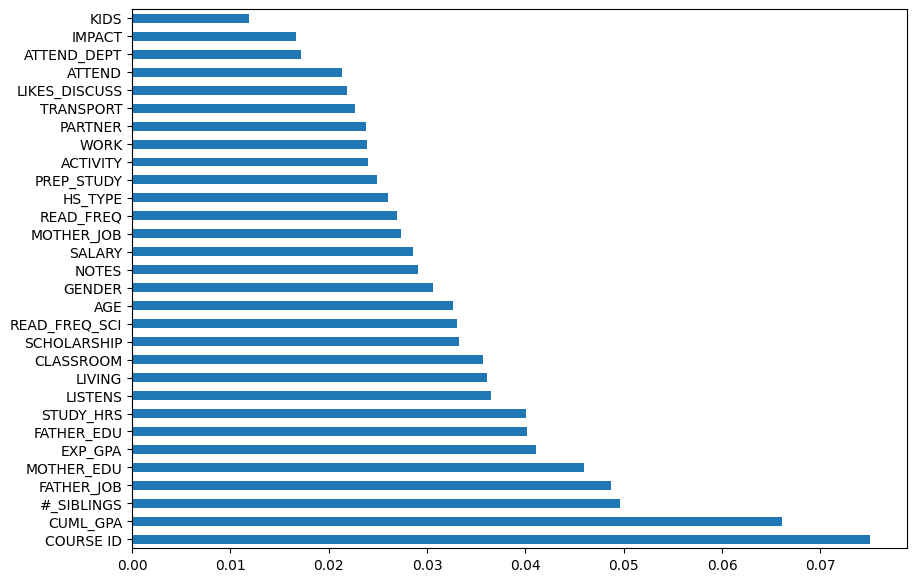

In [265]:
# plot the 10 most important features
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

Run the models again on new target variable
##### a. Logistic Regressor

In [252]:
# instantiate the model
logreg =  LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=7600) 

#fit the model
logreg.fit(X_train,y_train) 

#predict
y_pred=logreg.predict(X_test) 
y_pred


array([1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1], dtype=int64)

In [253]:
# Evaluate the model performance using the confusion matrix
print("Logistic Regressor Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Logistic Regressor Precision:",metrics.precision_score(y_test, y_pred, average='macro')) 
print("Logistic Regressor Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Logistic Regressor Accuracy: 0.6666666666666666
Logistic Regressor Precision: 0.6759259259259259
Logistic Regressor Recall: 0.5925925925925926


##### b. Random Forest Classifier

In [53]:
y_test

121    1
3      1
72     3
73     3
67     1
18     1
64     2
28     2
20     1
10     1
84     3
134    1
105    3
50     1
2      1
Name: GRADE, dtype: int64

In [49]:
X_test

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID
121,2,1,2,3,1,1,1,1,2,1,...,1,2,1,1,1,1,1,1,1,8
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
72,1,2,2,3,2,1,1,1,1,2,...,1,1,1,2,2,3,2,3,3,3
73,2,2,2,4,2,2,2,1,1,2,...,1,1,2,3,2,3,1,5,3,3
67,2,2,3,3,1,1,2,3,1,2,...,2,1,1,2,2,1,2,2,3,2
18,1,1,2,4,2,2,2,3,1,1,...,2,1,1,3,1,3,3,3,3,1
64,2,2,3,5,2,2,2,1,1,1,...,1,2,1,3,2,3,1,4,3,1
28,3,2,2,3,2,2,1,1,4,2,...,1,1,1,3,2,3,3,5,4,1
20,1,2,2,5,1,2,1,1,4,2,...,1,1,2,3,1,2,3,4,4,1
10,1,1,1,3,2,2,2,3,2,3,...,2,1,1,2,2,2,2,1,1,1


In [52]:
X_test.iloc[0]

AGE              2
GENDER           1
HS_TYPE          2
SCHOLARSHIP      3
WORK             1
ACTIVITY         1
PARTNER          1
SALARY           1
TRANSPORT        2
LIVING           1
MOTHER_EDU       1
FATHER_EDU       1
#_SIBLINGS       5
KIDS             3
MOTHER_JOB       2
FATHER_JOB       4
STUDY_HRS        5
READ_FREQ        3
READ_FREQ_SCI    3
ATTEND_DEPT      1
IMPACT           3
ATTEND           1
PREP_STUDY       2
PREP_EXAM        1
NOTES            1
LISTENS          1
LIKES_DISCUSS    1
CLASSROOM        1
CUML_GPA         1
EXP_GPA          1
COURSE ID        8
Name: 121, dtype: int64

In [50]:
y_test.iloc[0]

1

In [57]:
x_ = X_test.iloc[2].values
x_ =x_.reshape(1, -1)
x_

array([[1, 2, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 3, 3, 1, 1, 1,
        1, 1, 2, 2, 3, 2, 3, 3, 3]], dtype=int64)

In [34]:
y_test

121    1
3      1
72     3
73     3
67     1
18     1
64     2
28     2
20     1
10     1
84     3
134    1
105    3
50     1
2      1
Name: GRADE, dtype: int64

In [59]:
y_ = clf_rf.predict(x_)
y_

c:\Users\wakur\OneDrive\Documents\GitHub\University-Results\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [32]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Random Forest Classifier Acurracy: ", clf_rf.score(X_test,y_test))

Random Forest Classifier Acurracy:  0.6666666666666666


##### c. Naive Bayes Classifier

In [255]:
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Naive Bayes Classifier Acurracy: ", clf_nb.score(X_test,y_test))

Naive Bayes Classifier Acurracy:  0.6


<li>Random Forest Classifier is the best performing model, I will use it</li>

#### Train the 3 models with 50% of the features

In [256]:
# select features with top 50% MI scores
selector = SP(percentile=50)
selector.fit(X,y)
X_1 = selector.transform(X)
X_train_1,X_test_1,y_train,y_test = train_test_split(
    X_1,y
    ,random_state=0
    ,stratify=y
)

# select features with top 70% MI scores
selector = SP(percentile=70)
selector.fit(X,y)
X_2 = selector.transform(X)
X_train_2,X_test_2,y_train,y_test = train_test_split(
    X_2,y
    ,random_state=23
    ,stratify=y
)


# select features with top 75% MI scores
selector = SP(percentile=75)
selector.fit(X,y)
X_3 = selector.transform(X)
X_train_3,X_test_3,y_train,y_test = train_test_split(
    X_3,y
    ,random_state=9
    ,stratify=y
)

# select features with top 80% MI scores
selector = SP(percentile=80)
selector.fit(X,y)
X_4 = selector.transform(X)
X_train_4,X_test_4,y_train,y_test = train_test_split(
    X_4,y
    ,random_state=89
    ,stratify=y
)


# select features with top 100% MI scores (all features for easy comparison)
selector = SP(percentile=95)
selector.fit(X,y)
X_5 = selector.transform(X)
X_train_5,X_test_5,y_train,y_test = train_test_split(
    X_5,y
    ,random_state=3
    ,stratify=y
)

In [257]:
#Run the models on the selected features and compare their performance
rf_1 = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_1,y_train)
rf_2 = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_2,y_train)
rf_3 = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_3,y_train)
rf_4 = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_4,y_train)
rf_5 = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_5,y_train)

#get the accuracies of each model
score_1 = rf_1.score(X_test_1,y_test)
score_2 = rf_2.score(X_test_2,y_test)
score_3 = rf_3.score(X_test_3,y_test)
score_4= rf_4.score(X_test_4,y_test)
score_5 = rf_5.score(X_test_5,y_test)

#print out the accuracies
print(f"score_1:{score_1}\n score_2:{score_2}\n score_3:{score_3}\n score_4:{score_4}\n All features score:{score_5}\n")

score_1:0.43243243243243246
 score_2:0.32432432432432434
 score_3:0.40540540540540543
 score_4:0.5405405405405406
 All features score:0.5135135135135135



Reducing the features reduces the model accuracy so I'll keep all the features 


In [20]:
# save the model to a pickle file
pickle.dump(clf_rf, open('../models/model.pkl', 'wb'))